In [109]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram as ph
%matplotlib inline
import math

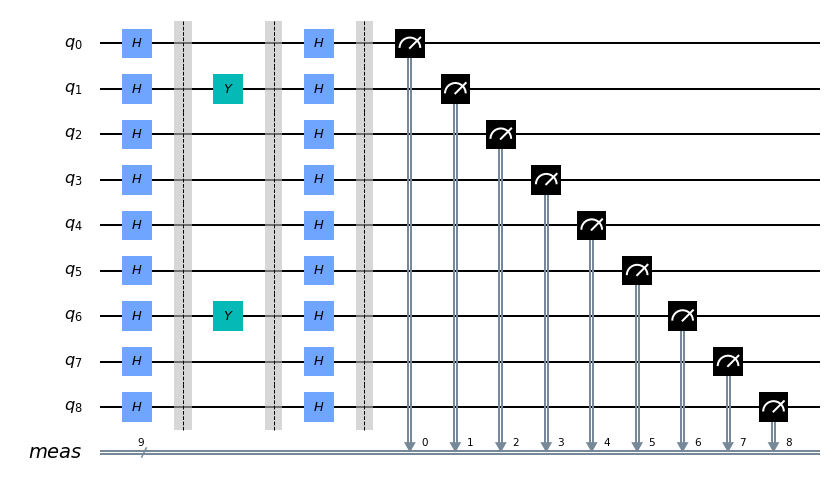

In [30]:
#0 1 2
#3 4 5
#6 7 8
mat = [0,1,0,0,0,0,1,0,0]
circuit = QuantumCircuit(len(mat))
circuit.h(range(len(mat)))
circuit.barrier()
for i in range(len(mat)):
    if mat[i] == 1:
        circuit.y(i)
circuit.barrier()
circuit.h(range(len(mat)))
circuit.measure_all()
circuit.draw('mpl')

In [31]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 100).result()
counts = result.get_counts()
print(counts)

{'001000010': 100}


In [74]:
def oracle(circuit):
    circuit.cz(0,2)
    circuit.cz(1,2)

In [75]:
def diffuser(circuit):
    """Apply inversion about the average step of Grover's algorithm."""
    qbits = circuit.qubits
    nqbits = len(qbits)
    for q in range(nqbits):
        circuit.h(q)
        circuit.x(q)
    #Do controlled-Z
    circuit.h(2)
    circuit.ccx(0,1,2)
    circuit.h(2)
    for q in range(nqbits):
        circuit.x(q)
        circuit.h(q)

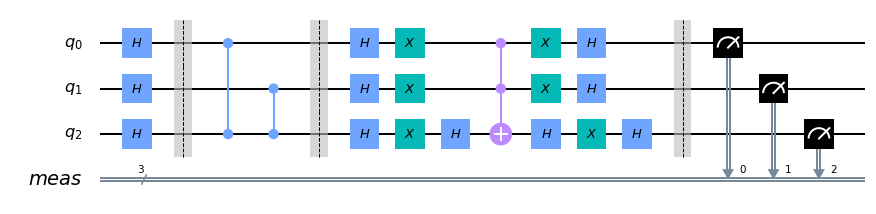

In [80]:
n=3
barriers = True
grover = QuantumCircuit(n)
for qb in range(n):
    grover.h(qb)
if barriers:
    grover.barrier()
oracle(grover)
if barriers:
    grover.barrier()
diffuser(grover)
grover.measure_all()
grover.draw('mpl')

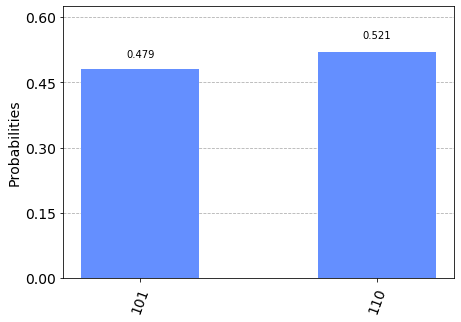

In [81]:
be = Aer.get_backend('qasm_simulator')
sh = 1024
ph(execute(grover,backend=be,shots=sh).result().get_counts())

In [82]:
from qiskit.quantum_info.operators import Operator

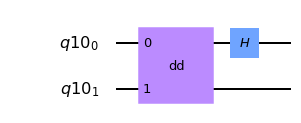

In [100]:
controls = QuantumRegister(2)
circuit = QuantumCircuit(controls)
dd = Operator([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 1, 0, 0],
    [1, 0, 0, 0]
])
circuit.unitary(dd, [0, 1], label='dd')
circuit.h(0)
circuit.draw('mpl')

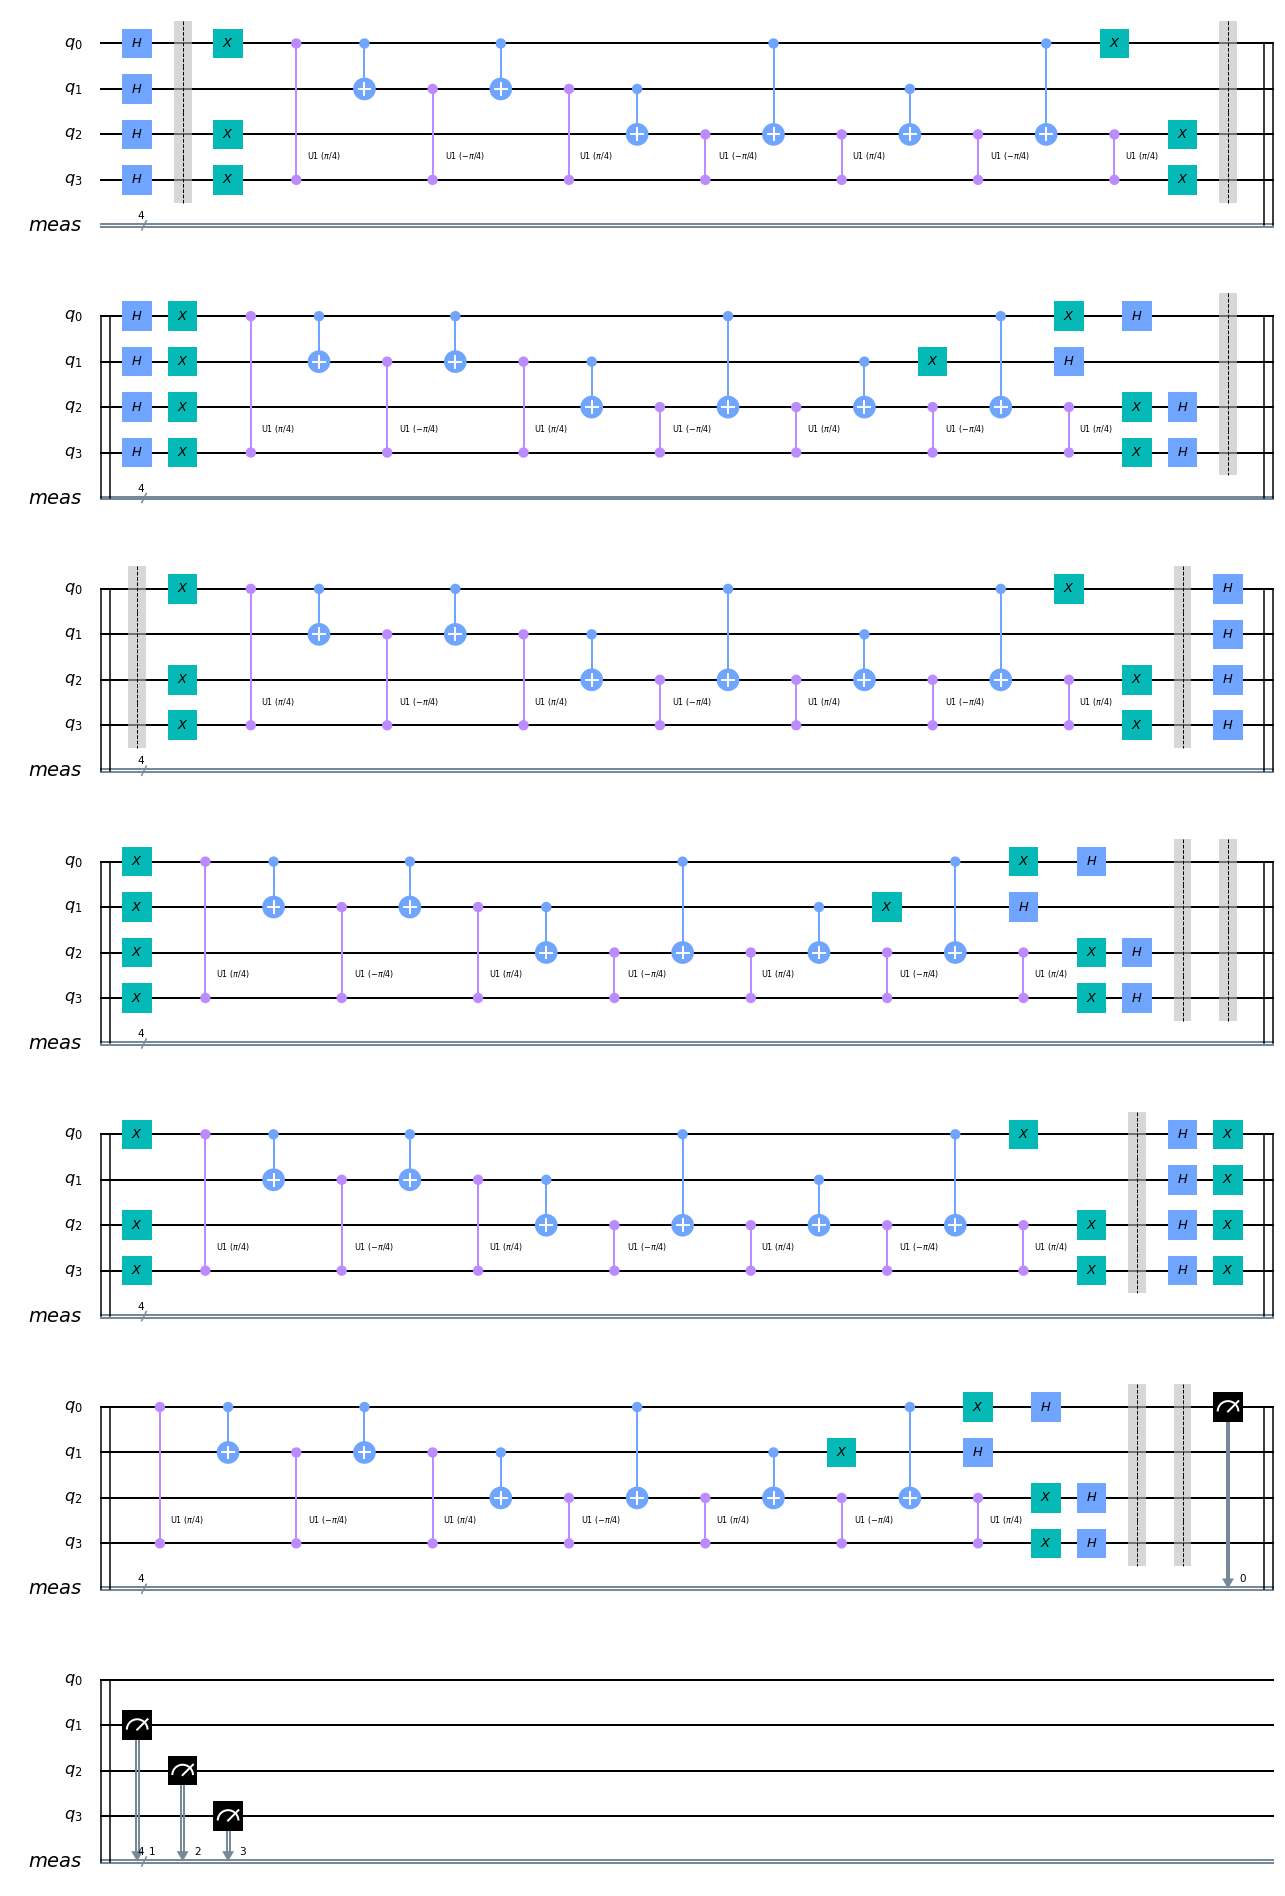

In [130]:
# 4-qubit grover's algorithm
pi = math.pi
qc = QuantumCircuit(4)
shots = 1024
qc.h([0,1,2,3])

## Oracle for 0010##
qc.barrier()
qc.x([0,2,3])
qc.cu1(pi/4, 0, 3)
qc.cx(0, 1)
qc.cu1(-pi/4, 1, 3)
qc.cx(0, 1)
qc.cu1(pi/4, 1, 3)
qc.cx(1, 2)
qc.cu1(-pi/4, 2, 3)
qc.cx(0, 2)
qc.cu1(pi/4, 2, 3)
qc.cx(1, 2)
qc.cu1(-pi/4, 2, 3)
qc.cx(0, 2)
qc.cu1(pi/4, 2, 3)
qc.x([0,2,3])
qc.barrier()
## Amplification ##
qc.h([0,1,2,3])
qc.x([0,1,2,3])
#Start cccz
qc.cu1(pi/4, 0, 3)
qc.cx(0, 1)
qc.cu1(-pi/4, 1, 3)
qc.cx(0, 1)
qc.cu1(pi/4, 1, 3)
qc.cx(1, 2)
qc.cu1(-pi/4, 2, 3)
qc.cx(0, 2)
qc.cu1(pi/4, 2, 3)
qc.cx(1, 2)
qc.cu1(-pi/4, 2, 3)
qc.cx(0, 2)
qc.cu1(pi/4, 2, 3)
#end cccz
qc.x([0,1,2,3])
qc.h([0,1,2,3])
qc.barrier()

#### Repeat 1
## Oracle for 0010##
qc.barrier()
qc.x([0,2,3])
qc.cu1(pi/4, 0, 3)
qc.cx(0, 1)
qc.cu1(-pi/4, 1, 3)
qc.cx(0, 1)
qc.cu1(pi/4, 1, 3)
qc.cx(1, 2)
qc.cu1(-pi/4, 2, 3)
qc.cx(0, 2)
qc.cu1(pi/4, 2, 3)
qc.cx(1, 2)
qc.cu1(-pi/4, 2, 3)
qc.cx(0, 2)
qc.cu1(pi/4, 2, 3)
qc.x([0,2,3])
qc.barrier()
## Amplification ##
qc.h([0,1,2,3])
qc.x([0,1,2,3])
#Start cccz
qc.cu1(pi/4, 0, 3)
qc.cx(0, 1)
qc.cu1(-pi/4, 1, 3)
qc.cx(0, 1)
qc.cu1(pi/4, 1, 3)
qc.cx(1, 2)
qc.cu1(-pi/4, 2, 3)
qc.cx(0, 2)
qc.cu1(pi/4, 2, 3)
qc.cx(1, 2)
qc.cu1(-pi/4, 2, 3)
qc.cx(0, 2)
qc.cu1(pi/4, 2, 3)
#end cccz
qc.x([0,1,2,3])
qc.h([0,1,2,3])
qc.barrier()

#### Repeat 2
## Oracle for 0010##
qc.barrier()
qc.x([0,2,3])
qc.cu1(pi/4, 0, 3)
qc.cx(0, 1)
qc.cu1(-pi/4, 1, 3)
qc.cx(0, 1)
qc.cu1(pi/4, 1, 3)
qc.cx(1, 2)
qc.cu1(-pi/4, 2, 3)
qc.cx(0, 2)
qc.cu1(pi/4, 2, 3)
qc.cx(1, 2)
qc.cu1(-pi/4, 2, 3)
qc.cx(0, 2)
qc.cu1(pi/4, 2, 3)
qc.x([0,2,3])
qc.barrier()
## Amplification ##
qc.h([0,1,2,3])
qc.x([0,1,2,3])
#Start cccz
qc.cu1(pi/4, 0, 3)
qc.cx(0, 1)
qc.cu1(-pi/4, 1, 3)
qc.cx(0, 1)
qc.cu1(pi/4, 1, 3)
qc.cx(1, 2)
qc.cu1(-pi/4, 2, 3)
qc.cx(0, 2)
qc.cu1(pi/4, 2, 3)
qc.cx(1, 2)
qc.cu1(-pi/4, 2, 3)
qc.cx(0, 2)
qc.cu1(pi/4, 2, 3)
#end cccz
qc.x([0,1,2,3])
qc.h([0,1,2,3])
qc.barrier()

qc.measure_all()
qc.draw('mpl')

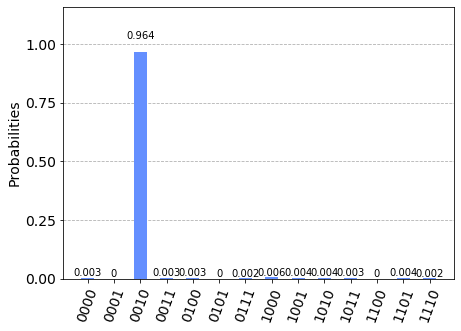

In [131]:
bcn = Aer.get_backend('qasm_simulator')
ph(execute(qc,backend=bcn,shots=shots).result().get_counts())